In [6]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [181]:
def Lorentzian(x, A, B, C, D):
    return A*(B**2)/( np.pi*((x-C)**2 + (B**2)) ) + D

In [182]:
DataFrame1 = pd.read_excel(io = "rayosx_data.xlsx", sheet_name = "Actividad 1", skiprows=1)
DataFrame2 = pd.read_excel(io = "rayosx_data.xlsx", sheet_name = "Actividad 2", skiprows=2)
DataFrame3 = pd.read_excel(io = "rayosx_data.xlsx", sheet_name = "Actividad 3", skiprows=1)

# Calibración

In [245]:
calibre = 22.6 - 20.5

In [246]:
cu_theta = DataFrame1["theta/°"].to_numpy() + calibre
cu_intensidad = DataFrame1["R(35kV)/Imp/s"].to_numpy() 

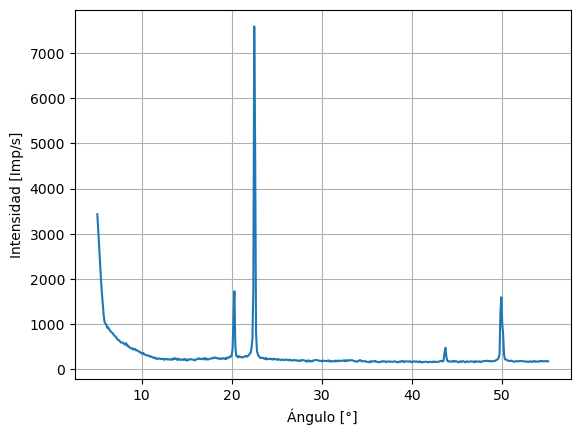

In [247]:
plt.plot(cu_theta, cu_intensidad)
plt.ylabel("Intensidad [Imp/s]")
plt.xlabel("Ángulo [°]")
plt.grid(True)

# Actividad 1

In [248]:
d = 2.014 #Armstrong
fase_values = np.linspace(-5, 5, 100)
best_fase = None
min_error = float('inf')

best_orden1x, best_orden1y = [], []
best_orden2x, best_orden2y = [], []

for fase in fase_values:
    orden1x, orden1y = [], []
    orden2x, orden2y = [], []
    
    for i in range(len(cu_theta)):
        if 15 <= cu_theta[i] <= 25:
            orden1x.append(2 * d * np.sin((cu_theta[i] - fase) * np.pi / 180))
            orden1y.append(cu_intensidad[i])
        
        elif 40 <= cu_theta[i] <= 50:
            orden2x.append(d * np.sin((cu_theta[i] - fase) * np.pi / 180))
            orden2y.append(cu_intensidad[i])

    error = sum((np.interp(orden1x, orden2x, orden2y, left=0, right=0) - orden1y) ** 2)
    
    if error < min_error:
        min_error = error
        best_fase = fase
        best_orden1x, best_orden1y = orden1x, orden1y
        best_orden2x, best_orden2y = orden2x, orden2y

best_fase

0.050505050505050164

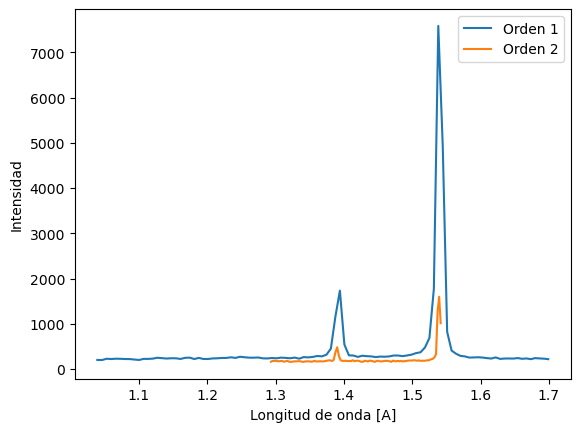

In [249]:
plt.plot(best_orden1x, best_orden1y, label="Orden 1")
plt.plot(best_orden2x, best_orden2y, label="Orden 2")
plt.legend()
plt.xlabel("Longitud de onda [A]")
plt.ylabel("Intensidad")
plt.show()

In [268]:
orden1x_1, orden1y_1 = [], []
orden1x_2, orden1y_2 = [], []

orden2x_1, orden2y_1 = [], []
orden2x_2, orden2y_2 = [], []


for i in range(len(best_orden1x)):
    if 1.35 <= best_orden1x[i] <= 1.45:
        
        orden1x_1.append(best_orden1x[i])
        orden1y_1.append(best_orden1y[i])
        
        orden2x_1.append(best_orden2x[i])
        orden2y_1.append(best_orden2y[i])
        
    if 1.5 <= best_orden1x[i] < 1.6:
        
        orden1x_2.append(best_orden1x[i])
        orden1y_2.append(best_orden1y[i])
        
        orden2x_2.append(best_orden2x[i])
        orden2y_2.append(best_orden2y[i])

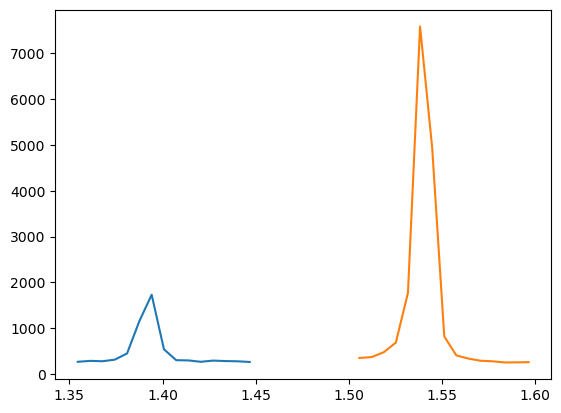

In [269]:
plt.plot(orden1x_1, orden1y_1)
plt.plot(orden1x_2, orden1y_2)

In [264]:
params1, pcov1 = sc.optimize.curve_fit(Lorentzian,orden1x_1,orden1y_1)
inc1 = np.sqrt(np.diag(pcov1))
params1, inc1

(array([ 7.36220578e+03, -3.25470028e-03,  1.39164312e+00,  2.50700202e+02]),
 array([5.75132081e+02, 2.61283946e-04, 7.78316798e-05, 7.56957478e+00]))

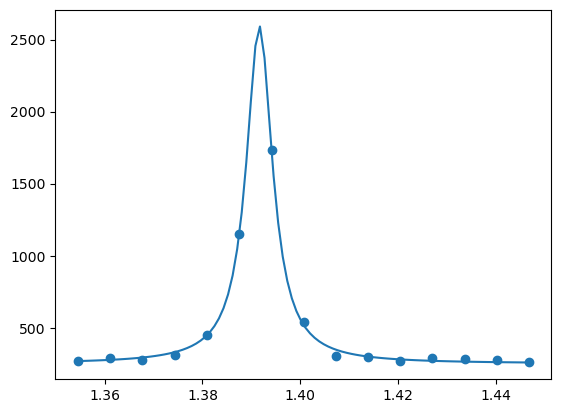

In [265]:
x1_plot = np.linspace(orden1x_1[0],orden1x_1[-1],100)
plt.plot(x1_plot, Lorentzian(x1_plot,*params1))
plt.scatter(orden1x_1,orden1y_1)

In [266]:
params2, pcov2 = sc.optimize.curve_fit(Lorentzian,orden1x_2,orden1y_2)
inc2 = np.sqrt(np.diag(pcov2))
params2, inc2

(array([3.72444059e+04, 3.24606398e-03, 1.54066670e+00, 1.65379767e+02]),
 array([4.25534315e+03, 3.84462580e-04, 1.08585086e-04, 5.75388311e+01]))

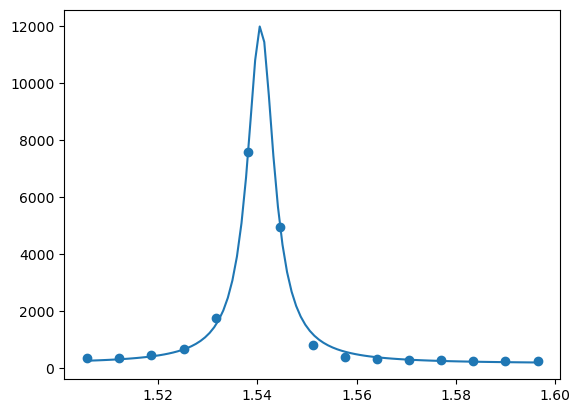

In [267]:
x2_plot = np.linspace(orden1x_2[0],orden1x_2[-1],100)
plt.plot(x2_plot, Lorentzian(x2_plot,*params2))
plt.scatter(orden1x_2,orden1y_2)

# Actividad 2

In [90]:
DataFrame2["theta/°"]

DataFrame2["R(30kV)/Imp/s"]

,theta/°,R(30kV)/Imp/s,theta/°.1,R(30kV)/Imp/s.1,theta/°.2,R(30kV)/Imp/s.2,theta/°.3,R(30kV)/Imp/s.3,theta/°.4,R(30kV)/Imp/s.4,theta/°.5,R(30kV)/Imp/s.5,theta/°.6,R(30kV)/Imp/s.6,theta/°.7,R(30kV)/Imp/s.7,theta/°.8,R(30kV)/Imp/s.8,theta/°.9,R(30kV)/Imp/s.9
0,6,374,6,146,6,75,6,42,6,16,6,313,6,270,6,240,6,216,6,206
1,7,301,7,110,7,52,7,26,7,10,7,239,7,204,7,180,7,159,7,154
2,8,224,8,77,8,37,8,21,8,7,8,176,8,149,8,131,8,116,8,110
3,9,165,9,58,9,29,9,17,9,6,9,130,9,111,9,102,9,89,9,84
4,10,134,10,46,10,26,10,15,10,6,10,105,10,92,10,80,10,76,10,73
5,11,134,11,45,11,26,11,14,11,7,11,99,11,87,11,82,11,73,11,70
6,12,135,12,47,12,25,12,15,12,6,12,98,12,86,12,81,12,75,12,72
7,13,134,13,45,13,25,13,14,13,6,13,99,13,86,13,81,13,75,13,70
